## Decision Tree(결정트리)
* 직관적으로 이해하기 쉬운알고리즘
* 데이터를 통하여 Tree 기반의 분류 규칙 생성
* Feature에서 Classification을 위한 if/ else 로직의 임계점을 찾아냄


## Decision Tree 분류모델을 구현하기 위한 API
* Argument(인자)

> * min_samples_split : Node 분할을 위한 최소한의 Sample 데이터 수

> * min_samples_leaf : Leaf Node가 되기 위한 최소한의 Sample 데이터 수

> * max_features : Decision Node 생성시 고려할 최대 Feature 개수

> * max_depth : Tree의 최대 깊이 제한 값

> * max_leaf_nodes : Leaf Node의 최대 개수

* Method(함수)

> * fit(X, y) : 학습 데이터를 이용하여 모델을 학습

> * predict(X) : 모델에 테스트 데이터를 입력하여 계산된 예측값(y) 반환

> * score(X, y) : 모델에 테스트 데이터를 입력하여 모델의 성능(정확도) 반환

* Attribute(속성)

> * classes_ : 학습에 사용된 클래스의 라벨 정보

> * feature_importances_ : 학습에 사용된 특성이 분류 결과에 미치는 영향도


In [1]:
# Iris 데이터셋 load 및 분할(훈련/ 테스트)
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x_train,x_test, y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

In [2]:
# DecisionTreeClassifier 모델 객체 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=156) 
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


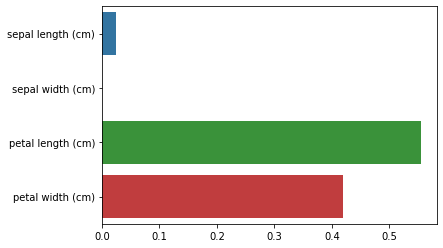

In [3]:
# Feature Importance(특성 중요도)
# 학습된 DecisionTreeClassifier 모델의 feature_importance_ 속성 값을 통해 Feature Importance 확인
import seaborn as sns 
import numpy as np

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris.feature_names, dt_clf.feature_importances_): 
  print('{0}: {1:.3f}'.format(name, value))
  sns.barplot(x=dt_clf.feature_importances_ , y=iris.feature_names)

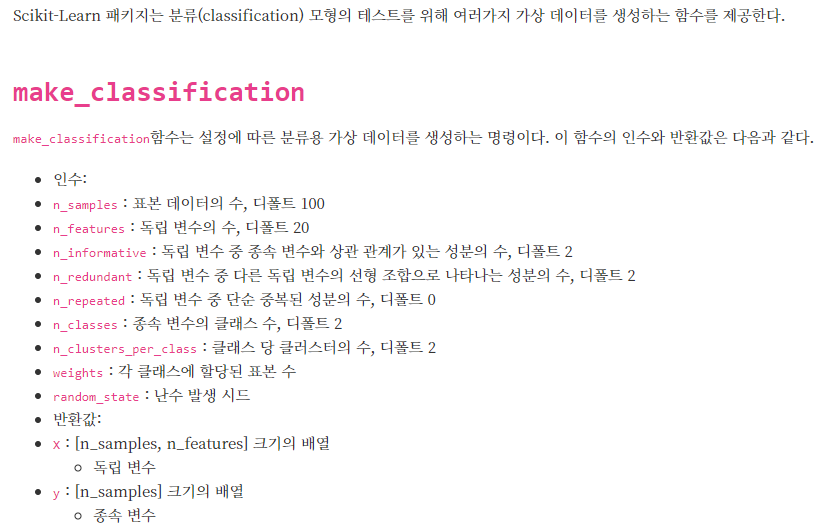

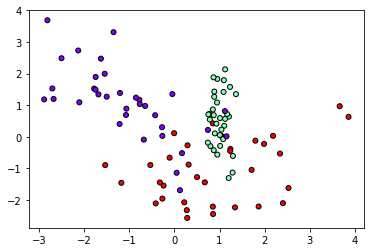

In [4]:
# Decision Tree 의 Overfitting
# Decision Node의 결정 경계시각화를 위한 데이터셋 생성 및 시각화
# 3개의 클래스, 2개의 독립 변수를 가진 데이터셋
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(x_features[:, 0], x_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')